In [1]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
dpi = 1000
plt.rcParams['font.family'] = 'Times New Roman'


%matplotlib inline

In [2]:
z2 = 1.96**2
p = 0.05
e = 0.02

In [3]:
def calculate_sample_prevalence(Z, P, E):
    return (Z**2 * P*(1 - P))/float(E**2)

In [4]:
calculate_sample_prevalence(Z = 1.96, P = 0.05, E = 0.02)

456.19

In [7]:
p1s = [x*.01 for x in range(101)]
#p1s

In [8]:
data = []
for p in p1s:
    data.append(calculate_sample_prevalence(Z = 1.96, P = p, E = 0.05))

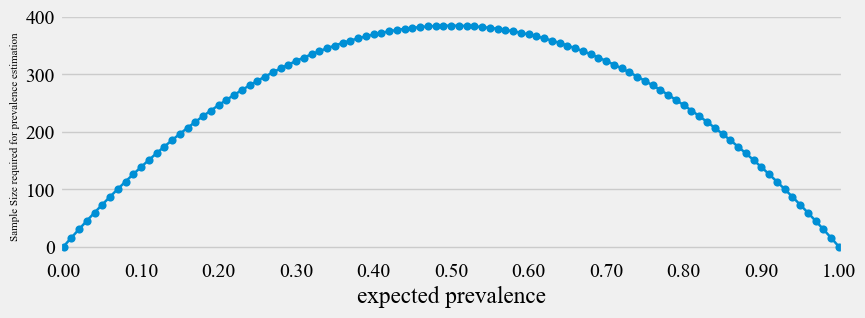

In [9]:
fig, ax = plt.subplots(1,1, figsize = [9,3])
sns.pointplot(
        x=p1s,
        y=data,ax =ax
        )
ax.set_xticks(range(0, len(p1s), 10))
ax.set_xticklabels(['{:.2f}'.format(x) for x in ax.get_xticks()/100])
ax.set_xlabel("expected prevalence")
ax.set_ylabel('Sample Size required for prevalence estimation', fontsize = 8)

plt.show()

In [ ]:
calculate_sample_prevalence(Z = 1.96, P = 0.05, E = 0.05)

### Population correction factor: estimation of prevalence

In [ ]:
#def sample_size_with_correction(N, Z, P, E):
#    return (N*Z**2*P*(1 - P))/float(E**2*(N-1)+(Z**2*P*(1-P)))

In [ ]:
#sample_size_with_correction(100, Z = 1.96, P = 0.05, E = 0.02)

In [10]:
def sample_size_with_correction(N, Z, P, E):
    n1 = calculate_sample_prevalence(Z = Z, P = P, E = E)
    return n1/(1+((n1-1)/N))

In [11]:
sample_size_with_correction(100, Z = 1.96, P = 0.05, E = 0.02)

82.16826671950143

In [12]:
Ns = np.arange(100, 550, 50)

In [13]:
data = []
prev = [0.01, 0.05, 0.1, 0.2, 0.4, 0.5]
for p in prev:
    for n in Ns:
        record = {}
        record['Sample Size'] = sample_size_with_correction(N =n,  Z = 1.96, P = p, E = 0.05)
        record['expected prevalence'] = p
        record['Population Size'] = n
        data.append(record)


df = pd.DataFrame(data)

In [14]:
df.head()

,Sample Size,expected prevalence,Population Size
0,13.319649,0.01,100
1,13.896062,0.01,150
2,14.203391,0.01,200
3,14.394401,0.01,250
4,14.524621,0.01,300


In [15]:
df[df['expected prevalence'].isin([0.1, 0.2])]

,Sample Size,expected prevalence,Population Size
18,58.280235,0.1,100
19,72.206103,0.1,150
20,82.003311,0.1,200
21,89.270886,0.1,250
22,94.876533,0.1,300
23,99.331825,0.1,350
24,102.957914,0.1,400
25,105.966583,0.1,450
26,108.503155,0.1,500
27,71.292898,0.2,100


C:\Users\prana\AppData\Local\Temp\ipykernel_8652\3598007510.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Ns)


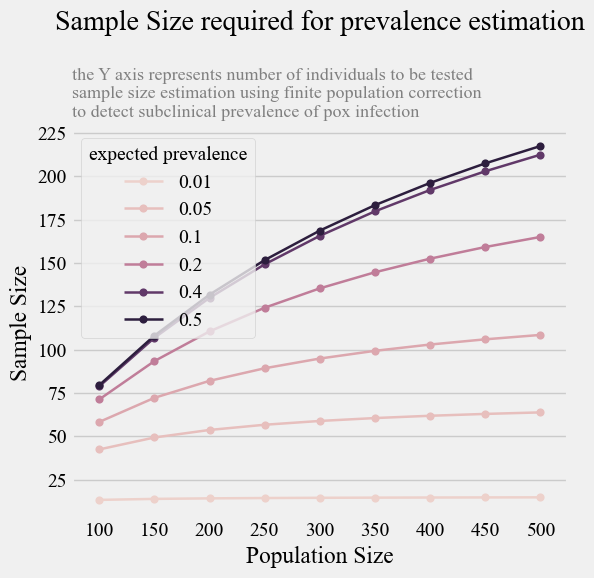

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.pointplot(x='Population Size',
            y='Sample Size',
            hue='expected prevalence', ax = ax,
            data=df)
ax.set_xticklabels(Ns)
ax.set_title('Sample Size required for prevalence estimation\n\n\n')
text2 = 'the Y axis represents number of individuals to be tested\nsample size estimation using finite population correction\nto detect subclinical prevalence of pox infection'
ax.text(-0.0, 1.02, text2, verticalalignment='bottom', 
         horizontalalignment='left',
         transform=ax.transAxes,
         color='gray', fontsize=13)
plt.tight_layout()
#plt.savefig('Sample_size_subclinical.png', dpi = dpi)
plt.show()

In [ ]:
stats.norm.cdf(1.96)

In [17]:
stats.norm.ppf(0.975)

1.959963984540054

In [18]:
stats.norm.ppf(1-0.90)

-1.2815515655446004